In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("Titanic-Dataset.csv")

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.dropna(subset=["Age","Embarked"],inplace=True)

In [7]:
data["Fare"].fillna(data["Fare"].mean(),inplace=True)

In [8]:
data=pd.get_dummies(data,columns=["Sex","Embarked"],drop_first=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        183 non-null    object 
 10  Sex_male     712 non-null    bool   
 11  Embarked_Q   712 non-null    bool   
 12  Embarked_S   712 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 63.3+ KB


In [10]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


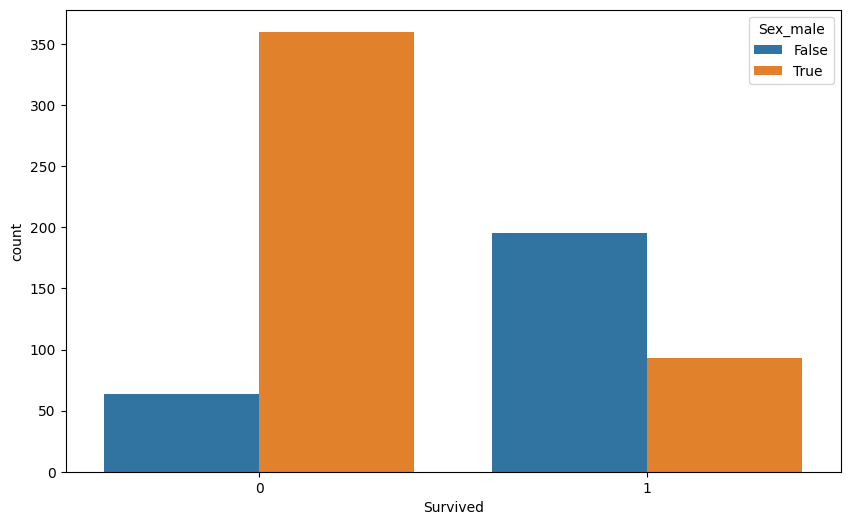

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data['Cabin'].fillna('Unknown', inplace=True)
data['Cabin_present'] = data['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
plt.figure(figsize=(10, 6))
sns.countplot(x="Survived", hue="Sex_male", data=data)
plt.show()

x = data[["Age", "Sex_male", "Pclass", "Fare", "Cabin_present"]]
y = data["Survived"]
data.dropna(subset=["Age", "Sex_male", "Pclass", "Fare", "Cabin_present", "Survived"], inplace=True)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Using Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_label = ["Survived" if pred == 1 else "Not Survived" for pred in y_pred]
pred_df = pd.DataFrame({"Pred_Survival": y_pred_label}, index=x_test.index)


Accuracy: 0.7622377622377622


In [19]:
data_with_pred.dropna(subset=["Pred_Survival"], inplace=True)

In [20]:
print(data_with_pred)

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
138          174         0       3   
139          175         0       1   
140          176         0       3   
141          178         0       1   
142          179         0       2   

                                                  Name   Age  SibSp  Parch   
0                              Braund, Mr. Owen Harris  22.0      1      0  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 